# 02 - 데이터프레임 결합


## 1.환경준비

* 라이브러리 불러오기

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 가져오기

In [ ]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")

sales1 = sales.loc[sales['Store_ID']==1]
sales2 = sales.loc[sales['Store_ID']==2]
sales5 = sales.loc[sales['Store_ID']==5]
sales11 = sales.loc[sales['Store_ID']==11]

products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

In [ ]:
sales1.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


In [ ]:
products.head()

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34


In [ ]:
stores.head()

,Store_ID,City,State,Store_Type
0,1,Saint Paul,Minnesota,4
1,2,Saint Paul,Minnesota,4
2,3,Saint Paul,Minnesota,4
3,4,Saint Paul,Minnesota,4
4,5,Oklahoma City,Oklahoma,4


## 2.결합1 : 붙이기 concat()

* 데이터를 생성해 봅시다.

In [ ]:
df1 = pd.DataFrame({'A':[10,25], 'B':[15,30]})
df2 = pd.DataFrame({'A':[20,30, 50], 'C':[35,30, 40]})
df2.drop([1], inplace = True)

display(df1)
display(df2)

,A,B
0,10,15
1,25,30


,A,C
0,20,35
2,50,40


#### (1) 세로로 합치기 : axis = 0

* join = 'inner'

In [ ]:
pd.concat([df1, df2], axis = 0, join = 'inner')

,A
0,10
1,25
0,20
2,50


* join = 'outer'

In [ ]:
pd.concat([df1, df2], axis = 0, join = 'outer')

,A,B,C
0,10,15.0,NaN
1,25,30.0,NaN
0,20,NaN,35.0
2,50,NaN,40.0


#### (2) 가로로 합치기 : axis = 1

* join = 'inner'

In [ ]:
pd.concat([df1, df2], axis = 1, join = 'inner')

,A,B,A,C
0,10,15,20,35


* join = 'outer'

In [ ]:
pd.concat([df1, df2], axis = 1, join = 'outer')

,A,B,A,C
0,10.0,15.0,20.0,35.0
1,25.0,30.0,NaN,NaN
2,NaN,NaN,50.0,40.0


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] sales1,2,5,11 데이터프레임을 하나로 합칩시다. 어떻게 합치는게 좋을까요?

In [ ]:
sales = pd.concat([sales1, sales2, sales5, sales11], axis = 0)

[문2] (조금 어려운 문제!)  
일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.concat 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.concat 으로 가로로 합치기



In [ ]:
s1 = sales1.groupby(['Date'], as_index = False)['Qty'].agg({'Store1_Qty':'sum'})
s2 = sales2.groupby(['Date'], as_index = False)['Qty'].agg({'Store2_Qty':'sum'})
s5 = sales5.groupby(['Date'], as_index = False)['Qty'].agg({'Store5_Qty':'sum'})
s11 = sales11.groupby(['Date'], as_index = False)['Qty'].agg({'Store11_Qty':'sum'})

In [ ]:
pd.concat([s1, s2, s5, s11], axis = 1)

,Date,Store1_Qty,Date,Store2_Qty,Date,Store5_Qty,Date,Store11_Qty
0,2013-01-01,0.000000,2013-01-01,0.000000,2013-01-01,0.000000,2013-01-01,0.000000
1,2013-01-02,6760.782000,2013-01-02,9221.338001,2013-01-02,9404.229020,2013-01-02,16593.312000
2,2013-01-03,5348.384001,2013-01-03,6830.089000,2013-01-03,6932.685000,2013-01-03,11032.676040
3,2013-01-04,5390.445001,2013-01-04,6742.984000,2013-01-04,6567.938000,2013-01-04,10962.687002
4,2013-01-05,5787.839000,2013-01-05,8583.055000,2013-01-05,7276.800000,2013-01-05,13315.896000
5,2013-01-06,2007.194000,2013-01-06,9317.139000,2013-01-06,9578.077030,2013-01-06,14165.615050
6,2013-01-07,5639.396000,2013-01-07,6047.629000,2013-01-07,5729.203000,2013-01-07,9946.420000
7,2013-01-08,5131.128000,2013-01-08,5545.928020,2013-01-08,5716.248000,2013-01-08,9258.956000
8,2013-01-09,6198.154980,2013-01-09,6061.471020,2013-01-09,5352.507000,2013-01-09,8644.922000
9,2013-01-10,4309.750000,2013-01-10,5070.431000,2013-01-10,5319.121020,2013-01-10,8470.169000


## 3.결합 ① : 조인 join(merge)

* 판다스에서 join은 굉장히 간단합니다.
* 자동으로 key를 잡아줍니다
* default로 inner join을 합니다.

In [ ]:
df1 = pd.DataFrame({'A':[1,2], 'B':[15,30], 'C':[20, 25]})
df2 = pd.DataFrame({'A':[2,3], 'D':[20, 35]})

display(df1)
display(df2)

,A,B,C
0,1,15,20
1,2,30,25


,A,D
0,2,20
1,3,35


### (1) inner merge

In [ ]:
pd.merge(df1, df2, how = 'inner', on = 'A')

,A,B,C,D
0,2,30,25,20


In [ ]:
pd.merge(df1, df2, how = 'inner')

,A,B,C,D
0,2,30,25,20


### (2) left merge

In [ ]:
pd.merge(df1, df2, how = 'left')

,A,B,C,D
0,1,15,20,NaN
1,2,30,25,20.0


### (3) right merge

In [ ]:
pd.merge(df1, df2, how = 'right')

,A,B,C,D
0,2,30.0,25.0,20
1,3,NaN,NaN,35


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] 일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.merge 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.merge 으로 결합하기



In [ ]:
s1 = sales1.groupby(['Date'], as_index = False)['Qty'].agg({'Store1_Qty':'sum'})
s2 = sales2.groupby(['Date'], as_index = False)['Qty'].agg({'Store2_Qty':'sum'})
s5 = sales5.groupby(['Date'], as_index = False)['Qty'].agg({'Store5_Qty':'sum'})
s11 = sales11.groupby(['Date'], as_index = False)['Qty'].agg({'Store11_Qty':'sum'})

In [ ]:
s_agg = pd.merge(s1, s2)
s_agg = pd.merge(s_agg, s5)
s_agg = pd.merge(s_agg, s11)
s_agg

,Date,Store1_Qty,Store2_Qty,Store5_Qty,Store11_Qty
0,2013-01-01,0.000000,0.000000,0.000000,0.000000
1,2013-01-02,6760.782000,9221.338001,9404.229020,16593.312000
2,2013-01-03,5348.384001,6830.089000,6932.685000,11032.676040
3,2013-01-04,5390.445001,6742.984000,6567.938000,10962.687002
4,2013-01-05,5787.839000,8583.055000,7276.800000,13315.896000
5,2013-01-06,2007.194000,9317.139000,9578.077030,14165.615050
6,2013-01-07,5639.396000,6047.629000,5729.203000,9946.420000
7,2013-01-08,5131.128000,5545.928020,5716.248000,9258.956000
8,2013-01-09,6198.154980,6061.471020,5352.507000,8644.922000
9,2013-01-10,4309.750000,5070.431000,5319.121020,8470.169000


[문2] 매장1에 대해서, 일별, 카테고리별 판매량 합계를 구해 봅시다. 



In [ ]:
sales1.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


In [ ]:
products.head()

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34


In [ ]:
temp = pd.merge(sales1, products)
temp.groupby(['Date', 'Category'], as_index = False)['Qty'].sum()

,Date,Category,Qty
0,2013-01-01,Drink,0.000
1,2013-01-01,Food,0.000
2,2013-01-01,Grocery,0.000
3,2013-01-01,Household Goods,0.000
4,2013-01-02,Drink,1158.000
...,...,...,...
119,2013-01-30,Household Goods,932.000
120,2013-01-31,Drink,971.000
121,2013-01-31,Food,751.766
122,2013-01-31,Grocery,1907.797


[문3] 도시별, 총판매량 합계를 구하시오.  



In [ ]:
stores.head()

,Store_ID,City,State,Store_Type
0,1,Saint Paul,Minnesota,4
1,2,Saint Paul,Minnesota,4
2,3,Saint Paul,Minnesota,4
3,4,Saint Paul,Minnesota,4
4,5,Oklahoma City,Oklahoma,4


In [ ]:
temp = pd.merge(sales, stores)
temp.groupby('City', as_index = False)['Qty'].sum()

,City,Qty
0,Minneapolis,285259.834092
1,Oklahoma City,184490.387069
2,Saint Paul,341393.106002


### (4) pivot
* pivot : 결합은 아니지만, 집계 후 데이터프레임 구조를 변형해서 조회하는데 종종 사용 됩니다.

* 단계
    * 1) groupby
    * 2) pivot

In [86]:
# 1) 매장1의 일별 카테고리별 판매량을 집계

temp = pd.merge(sales1, products)
temp2 = temp.groupby(['Date', 'Category'], as_index = False)['Qty'].sum()
temp2

,Date,Category,Qty
0,2013-01-01,Drink,0.000
1,2013-01-01,Food,0.000
2,2013-01-01,Grocery,0.000
3,2013-01-01,Household Goods,0.000
4,2013-01-02,Drink,1158.000
...,...,...,...
119,2013-01-30,Household Goods,932.000
120,2013-01-31,Drink,971.000
121,2013-01-31,Food,751.766
122,2013-01-31,Grocery,1907.797


In [99]:
# 2) pivot
temp3 = temp2.pivot( 'Category', 'Date' ,'Qty')
temp3

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-01-22,2013-01-23,2013-01-24,2013-01-25,2013-01-26,2013-01-27,2013-01-28,2013-01-29,2013-01-30,2013-01-31
Category,,,,,,,,,,,,,,,,,,,,,
Drink,0.0,1158.000,985.000000,1055.000000,1319.000,407.000,1267.000,1115.000,1290.00000,914.000,...,1114.000,1152.000,924.000,1213.000,1132.000,417.000,830.000,999.000,1140.000,971.000
Food,0.0,1227.652,913.699000,790.366000,901.057,416.912,852.676,829.851,967.58200,775.515,...,780.201,1025.047,791.388,836.856,880.019,416.783,821.064,668.154,900.092,751.766
Grocery,0.0,3305.130,2613.685001,2711.079001,2746.782,926.282,2689.720,2356.277,3023.57298,1933.235,...,2242.216,2824.296,2221.805,2393.208,2257.907,1162.207,2208.364,2001.047,2662.485,1907.797
Household Goods,0.0,1070.000,836.000000,834.000000,821.000,257.000,830.000,830.000,917.00000,687.000,...,786.000,769.000,622.000,701.000,551.000,247.000,625.000,617.000,932.000,711.000


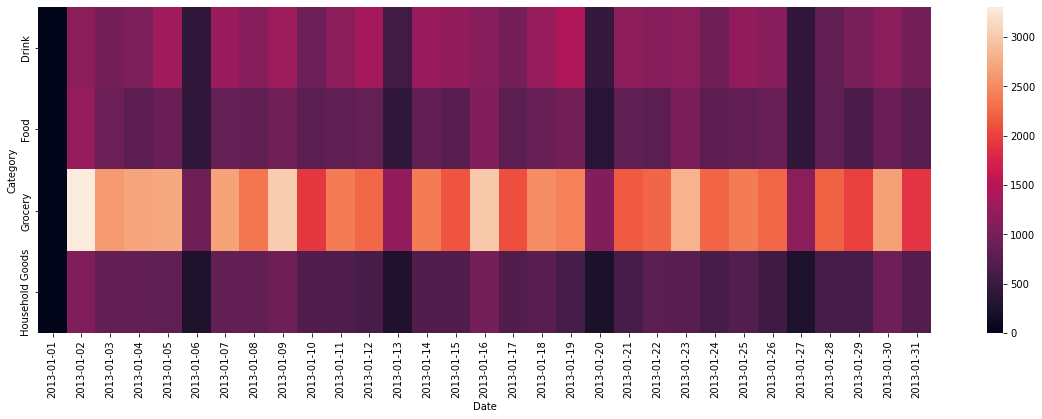

In [100]:
# sns.heatmap으로 시각화 할 수도 있습니다!

plt.figure(figsize = (20, 6))
sns.heatmap(temp3)
plt.show()

## 4.복습문제

In [75]:
# 라이브러리 불러오기
import pandas as pd

In [106]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")
products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

In [79]:
sales.head(3)

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7


In [80]:
products.head(3)

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23


In [81]:
stores.head(3)

,Store_ID,City,State,Store_Type
0,1,Saint Paul,Minnesota,4
1,2,Saint Paul,Minnesota,4
2,3,Saint Paul,Minnesota,4


1) sales에 금액(Amt) 변수를 추가하시오.
* Amt = Qty * Price

In [103]:
temp = pd.merge(sales, products[['Product_ID', 'Price', 'Category']])

temp['Amt'] = temp['Qty'] * temp['Price']
temp.head()

,Order_ID,Date,Store_ID,Qty,Product_ID,Price,Category,Amt
0,3,2013-01-01,1,0.0,3,8,Drink,0.0
1,36,2013-01-01,10,0.0,3,8,Drink,0.0
2,69,2013-01-01,11,0.0,3,8,Drink,0.0
3,102,2013-01-01,12,0.0,3,8,Drink,0.0
4,135,2013-01-01,13,0.0,3,8,Drink,0.0


2) City별 카테고리리별 매출액

In [104]:
temp2 = pd.merge(temp, stores)
temp2.groupby(['City','Category'], as_index = False)['Amt'].sum()

,City,Category,Amt
0,Albany,Drink,2.367080e+05
1,Albany,Food,6.998561e+04
2,Albany,Grocery,3.676481e+05
3,Albany,Household Goods,2.875500e+05
4,Annapolis,Drink,3.507200e+05
...,...,...,...
79,Saint Paul,Household Goods,1.081224e+07
80,Wilmington,Drink,0.000000e+00
81,Wilmington,Food,0.000000e+00
82,Wilmington,Grocery,0.000000e+00


3) City별 카테고리리별 매출액

In [ ]:
temp2 = pd.merge(temp, stores)
temp2.groupby(['City','Category'], as_index = False)['Amt'].sum()

,City,Category,Amt
0,Albany,Drink,2.367080e+05
1,Albany,Food,6.998561e+04
2,Albany,Grocery,3.676481e+05
3,Albany,Household Goods,2.875500e+05
4,Annapolis,Drink,3.507200e+05
...,...,...,...
79,Saint Paul,Household Goods,1.081224e+07
80,Wilmington,Drink,0.000000e+00
81,Wilmington,Food,0.000000e+00
82,Wilmington,Grocery,0.000000e+00


4) 매출액이 가장 높은 주(state) top 3

In [109]:
temp2 = pd.merge(temp, stores)
temp2.groupby('State', as_index = False)['Amt'].sum().sort_values('Amt', ascending = False).head(3)

,State,Amt
6,Minnesota,4.733903e+07
8,North Carolina,1.133845e+07
0,Arizona,4.192750e+06
